In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
train  = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

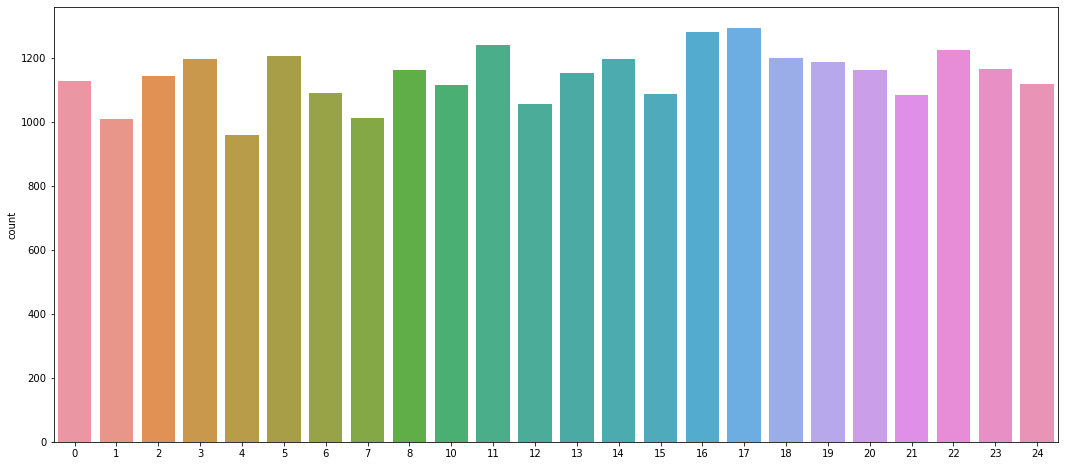

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [7]:
train.drop('label', axis=1, inplace = True)

In [8]:
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])


In [9]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


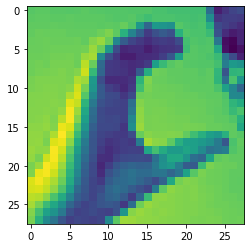

In [10]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [11]:
import cv2
import numpy as np 

for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [14]:
x_train = x_train /255
x_test = x_test / 255

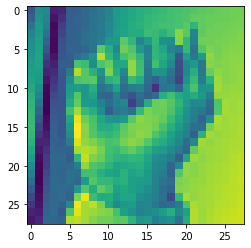

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])
            

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [19]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 26s 164ms/step - loss: 2.7425 - accuracy: 0.1728 - val_loss: 1.9005 - val_accuracy: 0.3891
Epoch 2/10
151/151 [==============================] - 24s 159ms/step - loss: 1.4118 - accuracy: 0.5339 - val_loss: 0.8972 - val_accuracy: 0.7225
Epoch 3/10
151/151 [==============================] - 24s 162ms/step - loss: 0.8322 - accuracy: 0.7194 - val_loss: 0.5676 - val_accuracy: 0.8085
Epoch 4/10
151/151 [==============================] - 24s 158ms/step - loss: 0.5524 - accuracy: 0.8164 - val_loss: 0.3452 - val_accuracy: 0.8998
Epoch 5/10
151/151 [==============================] - 25s 163ms/step - loss: 0.3850 - accuracy: 0.8714 - val_loss: 0.2340 - val_accuracy: 0.9361
Epoch 6/10
151/151 [==============================] - 29s 191ms/step - loss: 0.2728 - accuracy: 0.9107 - val_loss: 0.1613 - val_accuracy: 0.9602
Epoch 7/10
151/151 [==============================] - 32s 214ms/step - loss: 0.2046 - accuracy: 0.9334 - val_loss: 0.1114 - val_ac

In [20]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


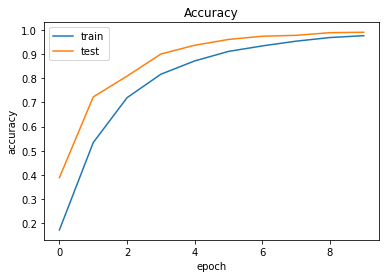

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [22]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [23]:
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [24]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    frame = cv2.flip(frame, 1)
    
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320,100),(620,400),(255,0,0),5)
    
    roi = roi.reshape(1,28,28,1)
    
    result = str(np.argmax(model.predict(roi), axis=-1)[0])

    cv2.putText(copy, getLetter(result), (300,100), cv2.FONT_HERSHEY_COMPLEX, 2, (0,255,0),2)
    cv2.imshow('frame',copy)
    
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()
    